In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
folder_path = '/content/drive/My Drive/AI_Essentials'
print(os.listdir(folder_path))


['creditcard.csv']


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/AI_Essentials/creditcard.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.shape)

(284807, 31)


In [ ]:
df['Class'].value_counts()


,count
Class,
0,284315
1,492


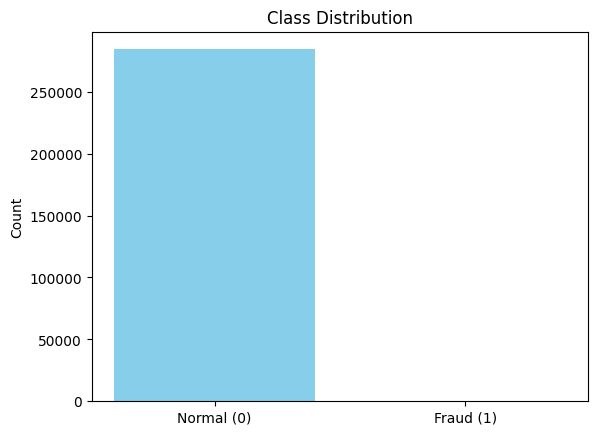

In [ ]:
import matplotlib.pyplot as plt
count = df['Class'].value_counts()
plt.bar(count.index, count.values, color=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Normal (0)', 'Fraud (1)'])
plt.title('Class Distribution')
plt.ylabel('Count')
plt.show()

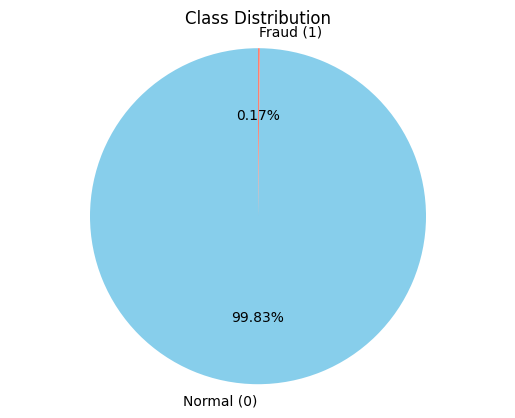

In [ ]:
plt.pie(count.values, labels=['Normal (0)', 'Fraud (1)'],
        autopct='%1.2f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)

In [ ]:
X_train_raw = X_train.copy()
X_test_raw = X_test.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = [c for c in ['Amount', 'Time'] if c in X_train.columns]
if cols_to_scale:
  scaler.fit(X_train[cols_to_scale])
  X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
  X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
print("Raw shape is: ", X_train_raw.shape, X_test_raw.shape)
print("Scaled shape is: ", X_train.shape, X_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report
import joblib

model = LogisticRegression(max_iter=2000, class_weight='balanced', n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("PR AUC:", average_precision_score(y_test, y_prob))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

joblib.dump(model, 'fraud_logreg_baseline.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\nМодель сохранена: fraud_logreg_baseline.pkl")

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report
import joblib

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("После SMOTE:", y_train_sm.value_counts().to_dict())

model_smote = LogisticRegression(max_iter=2000, random_state=42, n_jobs=-1)
model_smote.fit(X_train_sm, y_train_sm)

y_prob_sm = model_smote.predict_proba(X_test)[:,1]
y_pred_sm = model_smote.predict(X_test)

print("\nSMOTE LogisticRegression:")
print("ROC AUC:", roc_auc_score(y_test, y_prob_sm))
print("PR AUC:", average_precision_score(y_test, y_prob_sm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sm, digits=4))

joblib.dump(model_smote, 'fraud_logreg_smote.pkl')
print("\nМодель сохранена: fraud_logreg_smote.pkl")
